<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project- Titanic Survival Prediction Project</h3>
</div>

## Importing the libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")


## Load and Prepare Data

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## EDA

<h3 style="text-align: center; margin: 0; direction: ltr; background-color: cadetblue; color: white; border-radius: 15px;">Calculate statistical characteristics</h3>

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h3 style="text-align: center; margin: 0; direction: ltr; background-color: cadetblue; color: white; border-radius: 15px;">The ratio of deceased to survived individuals, segregated by gender</h3>

In [5]:
data.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

<h3 style="text-align: center; margin: 0; direction: ltr; background-color: cadetblue; color: white; border-radius: 15px;">The ratio of deceased to survived individuals, categorized by ticket class</h3>

In [6]:
data.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

<h3 style="text-align: center; margin: 0; direction: ltr; background-color: cadetblue; color: white; border-radius: 15px;">The ratio of deceased to survived individuals, taking into account the following conditions:</h3>
<h3 style="margin: 0; direction: rtl; background-color: cadetblue; color: white; border-radius: 15px;"></h3>
<ul style="margin: 0; direction: ltr; background-color: cadetblue; color: white; border-radius: 15px;">
<li>They are women</li>
<li>They are over 18 years old</li>
<li>Their ticket class is 2</li>
</ul>

In [7]:
data.query("Sex == 'female' and Age > 18 and Pclass == 1 ")['Survived'].value_counts()

Survived
1    72
0     2
Name: count, dtype: int64

<h3 style="text-align: center; margin: 0; direction: ltr; background-color: cadetblue; color: white; border-radius: 15px;">The number of siblings and spouses of passengers who have died.</h3>

In [8]:
data.groupby('Survived')['SibSp'].value_counts()

Survived  SibSp
0         0        398
          1         97
          2         15
          4         15
          3         12
          8          7
          5          5
1         0        210
          1        112
          2         13
          3          4
          4          3
Name: count, dtype: int64

<h3 style="text-align: center; margin: 0; direction: ltr; background-color: cadetblue; color: white; border-radius: 15px;">Statistical analysis of ticket prices for passengers, categorized by survival status (alive or deceased).</h3>

In [9]:
summary = data.groupby('Survived')['Fare'].agg(['min', 'mean','std', 'max'])
print(summary)

          min       mean        std       max
Survived                                     
0         0.0  22.117887  31.388207  263.0000
1         0.0  48.395408  66.596998  512.3292


<h3 style="text-align: center; margin: 0; direction: ltr; background-color: cadetblue; color: white; border-radius: 15px;">Statistical analysis of ticket prices for passengers, categorized by ticket class.</h3>

In [10]:
summary = data.groupby('Pclass')['Fare'].agg(['min', 'mean','std', 'max'])
print(summary)

        min       mean        std       max
Pclass                                     
1       0.0  84.154687  78.380373  512.3292
2       0.0  20.662183  13.417399   73.5000
3       0.0  13.675550  11.778142   69.5500


<h3 style="text-align: center; margin: 0; direction: ltr; background-color: cadetblue; color: white; border-radius: 15px;">The average ticket price for passengers, segmented by 10-year age intervals.</h3>

In [11]:
max_age = np.nanmax(data['Age'])
max_bin = np.ceil(max_age / 10) * 10
data['AgeRange'] = pd.cut(data['Age'], bins=range(0, int(max_bin) + 11, 10), right=False)
average_fare_by_age_group = data.groupby('AgeRange')['Fare'].mean()

print(average_fare_by_age_group)
data.drop('AgeRange',axis=1,inplace=True)


AgeRange
[0, 10)     30.576679
[10, 20)    32.535132
[20, 30)    27.278937
[30, 40)    40.377294
[40, 50)    38.002297
[50, 60)    47.933333
[60, 70)    48.367542
[70, 80)    30.197233
[80, 90)    30.000000
Name: Fare, dtype: float64


<h3 style="text-align: center; margin: 0; direction: ltr; background-color: cadetblue; color: white; border-radius: 15px;">Detection of outliers in the data.</h3>

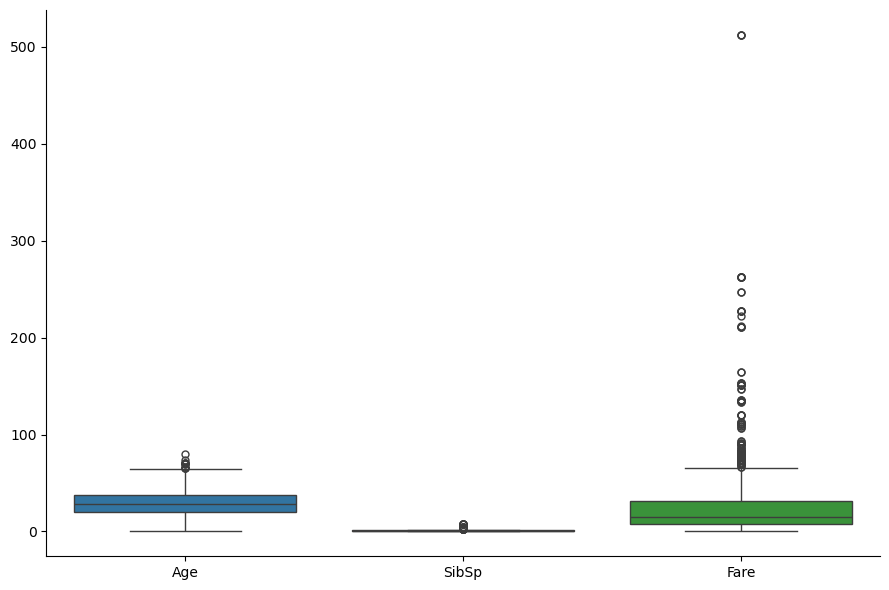

In [12]:
sns.catplot(data[['Age','SibSp','Fare']],kind='box',height=6, aspect=1.5)

<h3 style="text-align: center; margin: 0; direction: ltr; background-color: cadetblue; color: white; border-radius: 15px;">To observe the impact of numerical columns on the survival status of passengers, plot a correlation matrix. It seems that the following features have less influence:</h3>
<h3 style="margin: 0; direction: rtl; background-color: cadetblue; color: white; border-radius: 15px;"></h3>
<ul style="margin: 0; direction: ltr; background-color: cadetblue; color: white; border-radius: 15px;">
<li>PassengerId</li>
<li>SibSp</li>
<li>Age</li>
</ul>

<Axes: >

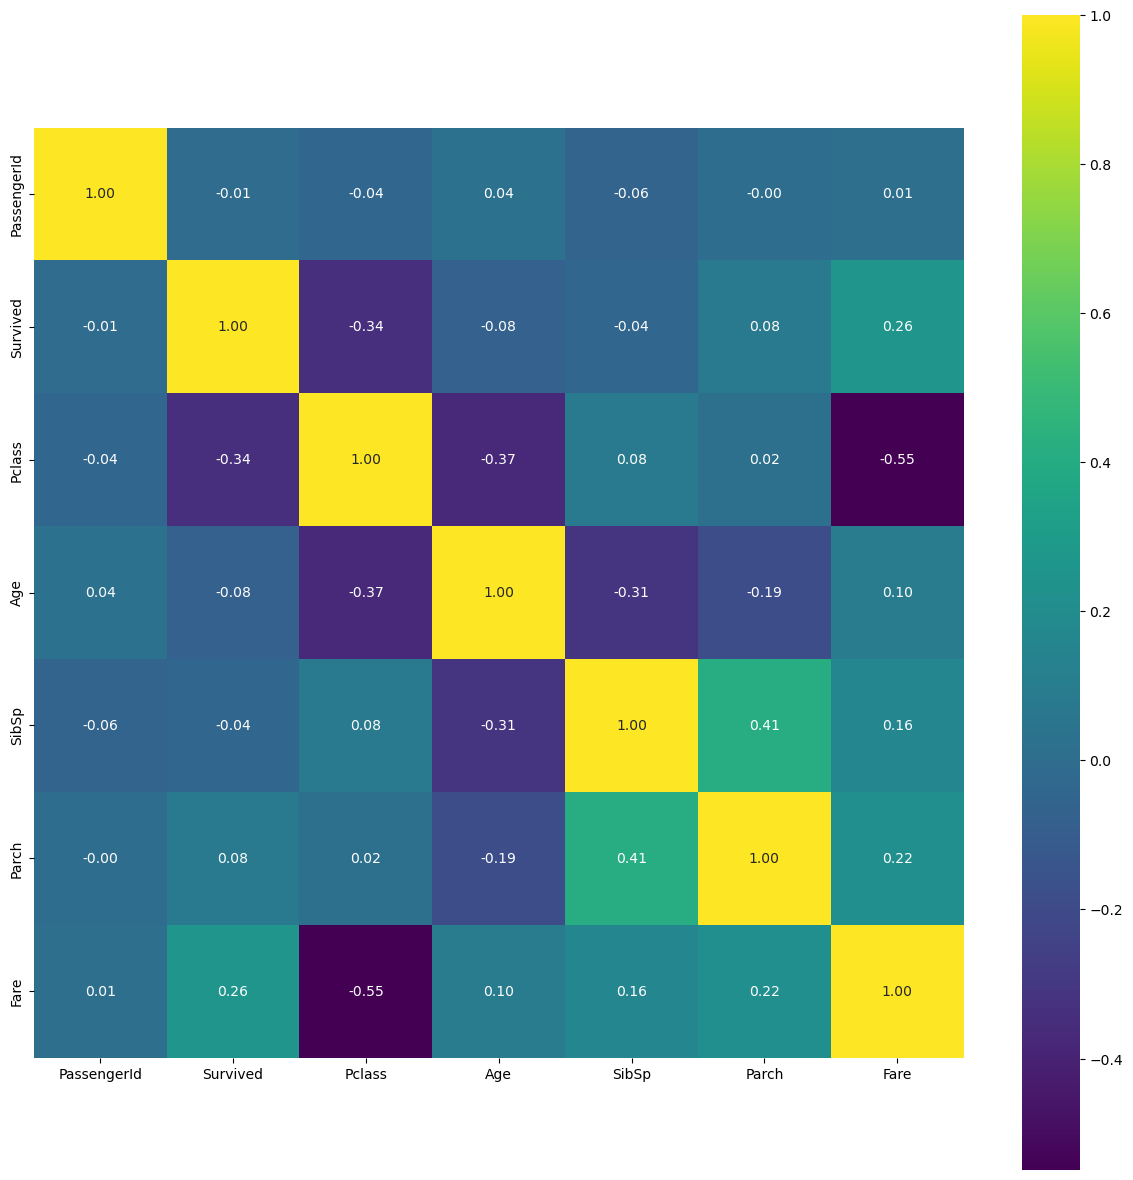

In [13]:
numeric_data = data.select_dtypes(include='number')

corr = numeric_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,square=True,cbar=True,fmt='.2f',cmap='viridis')

## Data Preprocessing

<h3 style="text-align: center; margin: 0; direction: ltr; background-color: cadetblue; color: white; border-radius: 15px;">Detecting null values in the dataset.</h3>

In [14]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
knn_imputer = KNNImputer(n_neighbors=10)
sim_imputer = SimpleImputer(strategy='most_frequent')

data['Age'] = knn_imputer.fit_transform(data[['Age']])
data[['Cabin', 'Embarked']] = sim_imputer.fit_transform(data[['Cabin', 'Embarked']])

In [16]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<h3 style="text-align: center; margin: 0; direction: rtl; background-color: cadetblue; color: white; border-radius: 15px;">Removing the 'Name' and 'PassengerId' columns.</h3>

In [17]:
data.drop(['Name','PassengerId'],axis=1,inplace=True)

<h3 style="text-align: center; margin: 0; direction: rtl; background-color: cadetblue; color: white; border-radius: 15px;">Preparing non-numeric columns.</h3>

In [18]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [19]:
le = LabelEncoder()
columns_to_encode = ['Sex', 'Ticket', 'Cabin', 'Embarked']

for column in columns_to_encode:
    data[column] = le.fit_transform(data[column])

In [20]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,523,7.2500,47,2
1,1,1,0,38.000000,1,0,596,71.2833,81,0
2,1,3,0,26.000000,0,0,669,7.9250,47,2
3,1,1,0,35.000000,1,0,49,53.1000,55,2
4,0,3,1,35.000000,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,101,13.0000,47,2
887,1,1,0,19.000000,0,0,14,30.0000,30,2
888,0,3,0,29.699118,1,2,675,23.4500,47,2
889,1,1,1,26.000000,0,0,8,30.0000,60,0


<h3 style="text-align: center; margin: 0; direction: ltr; background-color: cadetblue; color: white; border-radius: 15px;">Scaling the dataset.</h3>

In [21]:
X = data.iloc[:,1:].values
y = data.iloc[:,0].values

In [22]:
sc = StandardScaler()
X = sc.fit_transform(X)

## Strorytelling - Visualization

<h3 style="text-align: center; margin: 0; direction: ltr; background-color: cadetblue; color: white; border-radius: 15px;">Distribution of Passengers by Gender
</h3>

Text(0.5, 1.0, 'Distribution of Passengers by Gender')

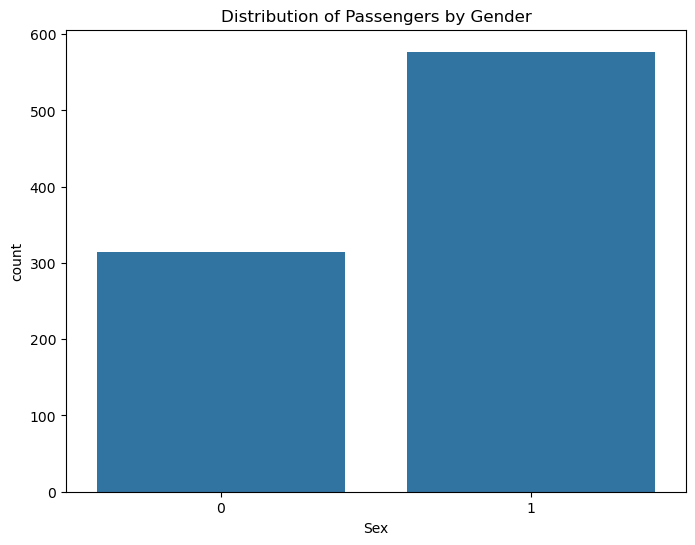

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=data)
plt.title('Distribution of Passengers by Gender')

<h3 style="text-align: center; margin: 0; direction: ltr; background-color: cadetblue; color: white; border-radius: 15px;">Survival Distribution by Gender
</h3>

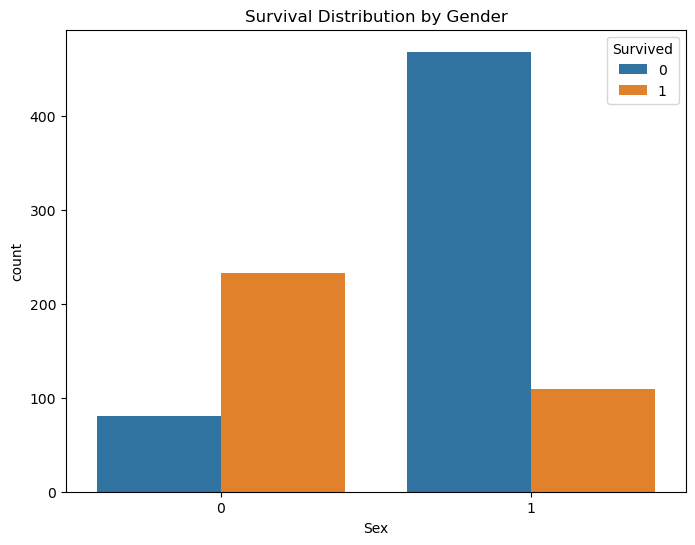

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival Distribution by Gender')
plt.show()

<h3 style="text-align: center; margin: 0; direction: ltr; background-color: cadetblue; color: white; border-radius: 15px;">Distribution of Passenger Ages
</h3>

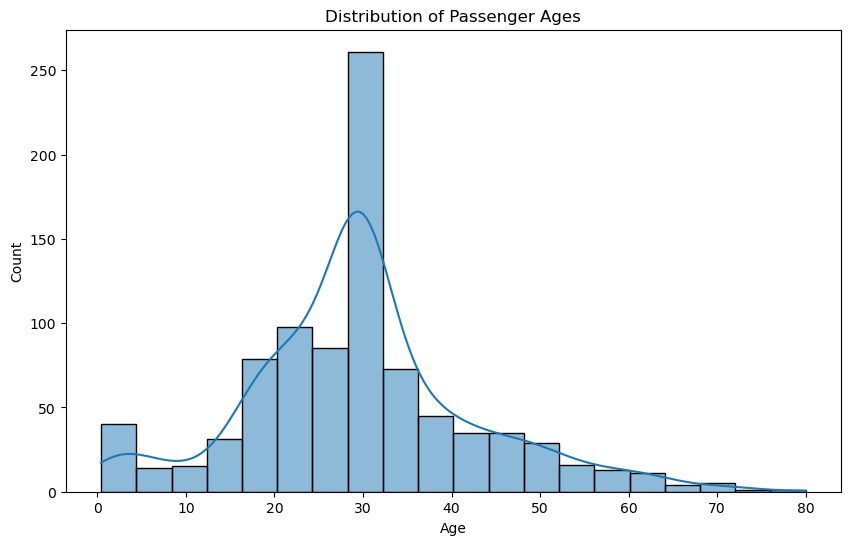

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Passenger Ages')
plt.show()

<h3 style="text-align: center; margin: 0; direction: ltr; background-color: cadetblue; color: white; border-radius: 15px;">Distribution of Ticket Fare
</h3>

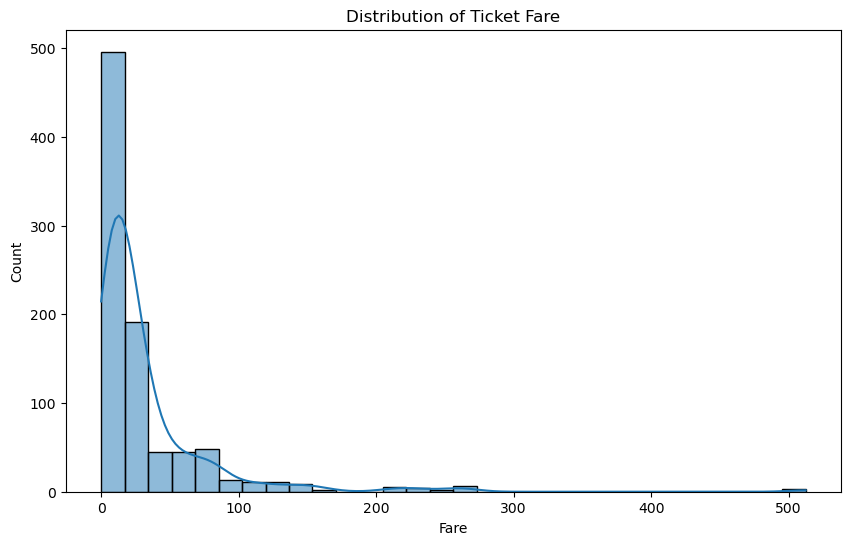

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Fare'], bins=30, kde=True)
plt.title('Distribution of Ticket Fare')
plt.show()

<h3 style="text-align: center; margin: 0; direction: ltr; background-color: cadetblue; color: white; border-radius: 15px;">Distribution of Passenger Class
</h3>

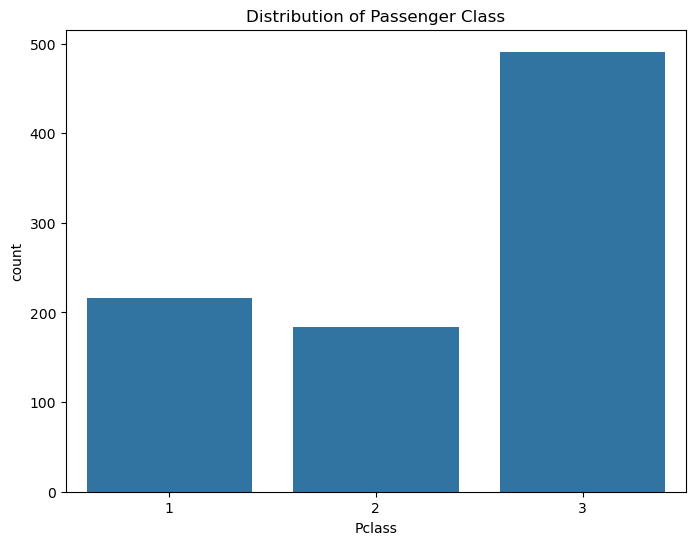

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=data)
plt.title('Distribution of Passenger Class')
plt.show()

<h3 style="text-align: center; margin: 0; direction: ltr; background-color: cadetblue; color: white; border-radius: 15px;">Survival Distribution by Passenger Class</h3>

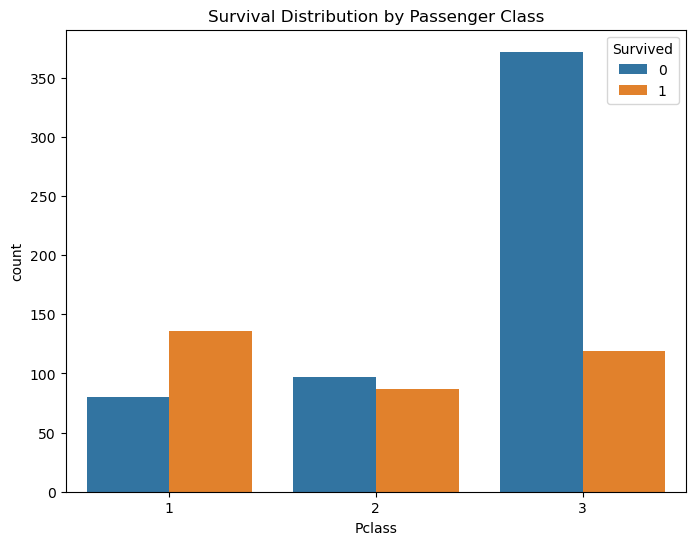

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival Distribution by Passenger Class')
plt.show()

<h3 style="text-align: center; margin: 0; direction: ltr; background-color: cadetblue; color: white; border-radius: 15px;">Performing detailed analysis of relationships between variables.
</h3>

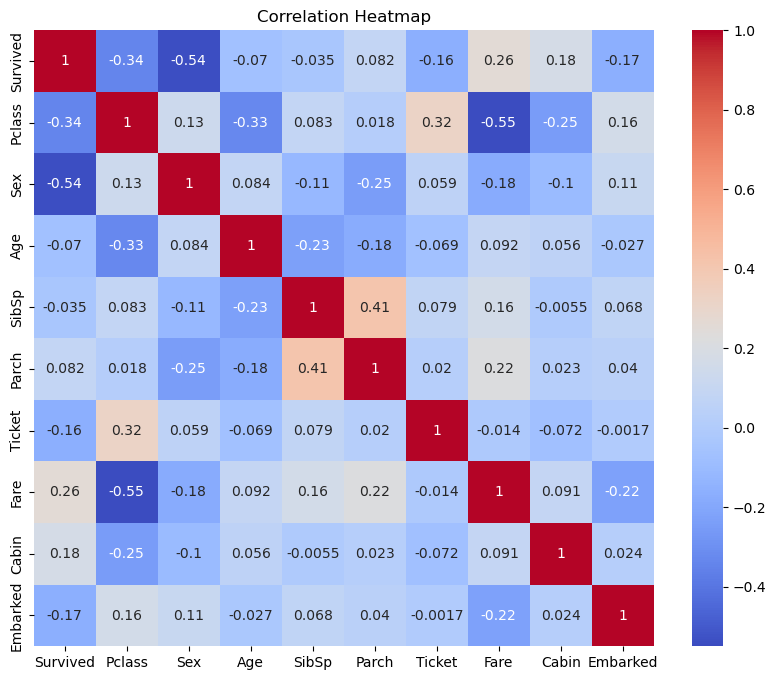

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<h3 style="text-align: center; margin: 0; direction: ltr; background-color: cadetblue; color: white; border-radius: 15px;">Analyzing age and gender in relation to survival.</h3>

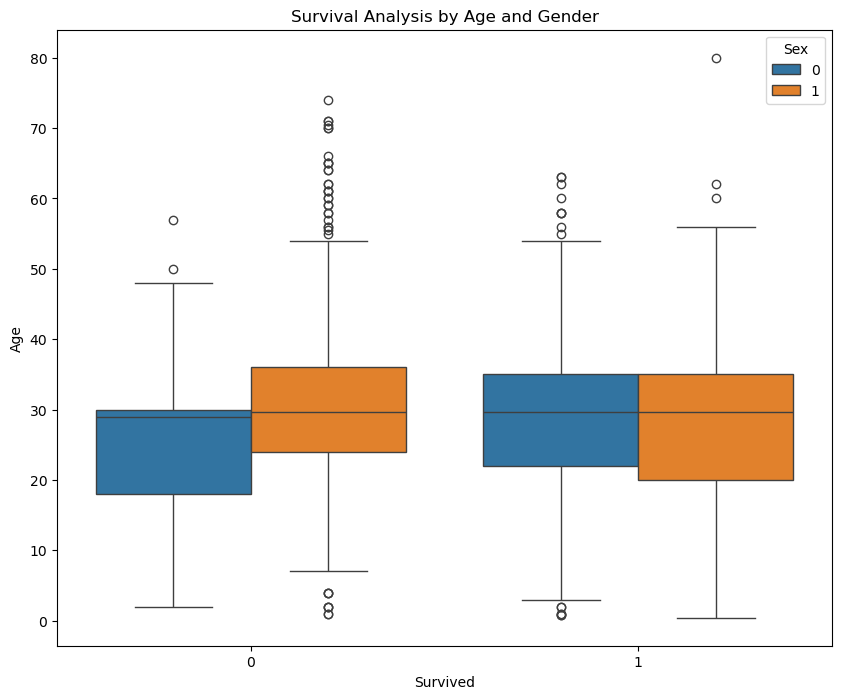

In [30]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Survived', y='Age', hue='Sex', data=data)
plt.title('Survival Analysis by Age and Gender')
plt.show()

<h3 style="text-align: center; margin: 0; direction: ltr; background-color: cadetblue; color: white; border-radius: 15px;">Analyzing the distribution of ticket fares based on travel class and gender.</h3>

<Figure size 1200x800 with 0 Axes>

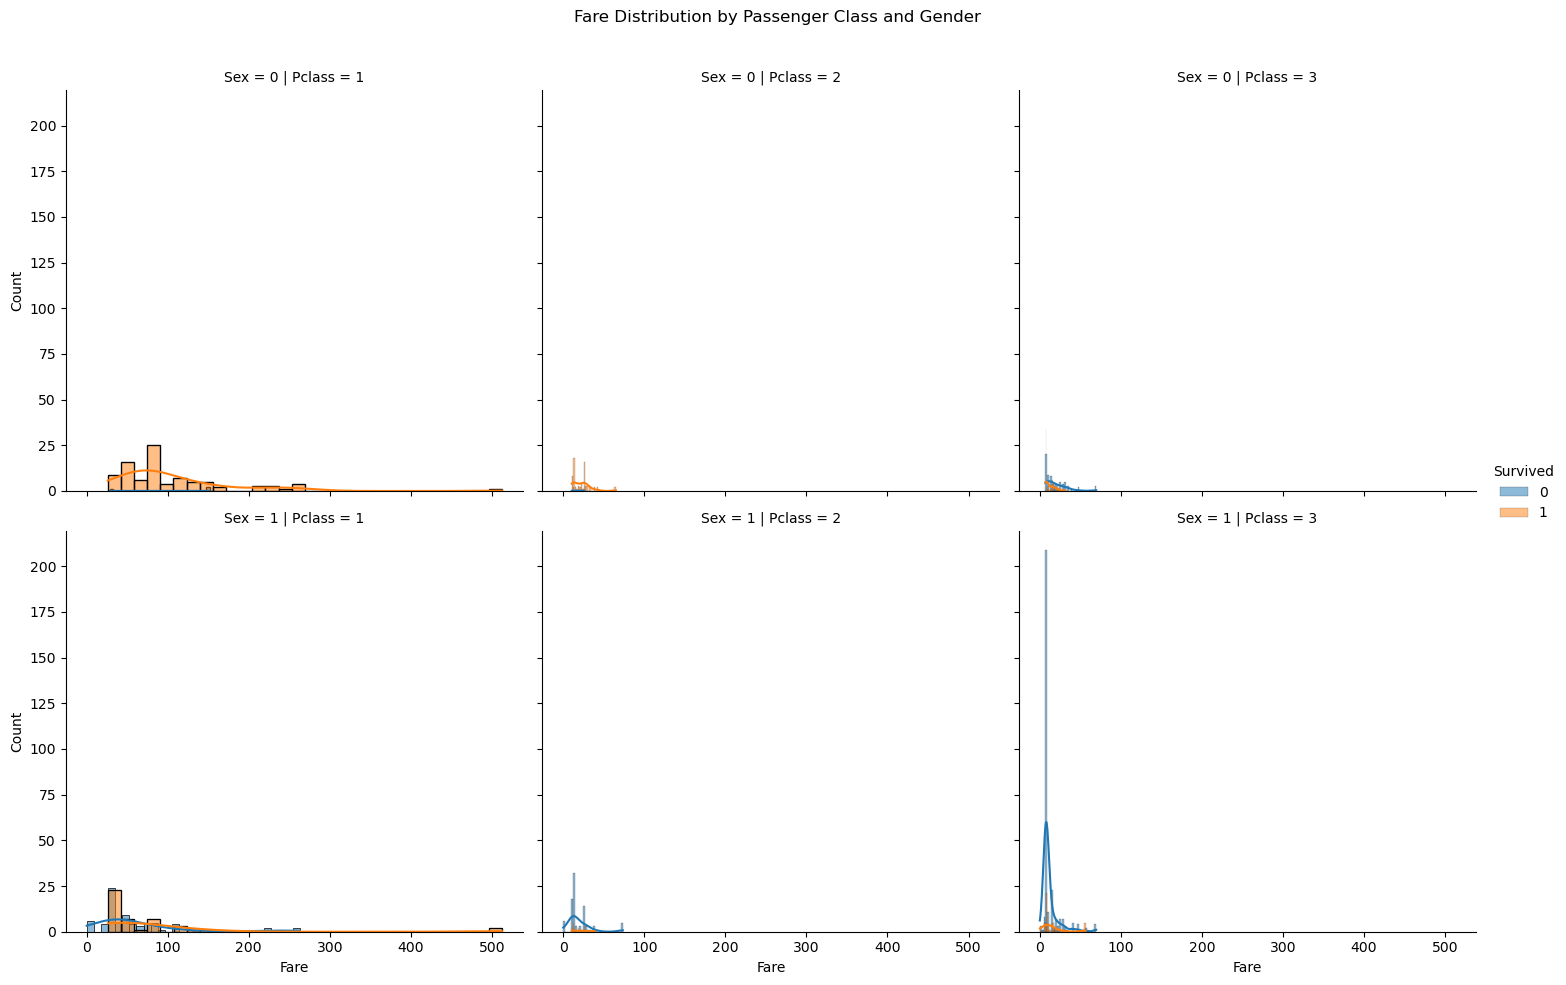

In [31]:
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(data, col='Pclass', row='Sex', hue='Survived', height=5)
g.map(sns.histplot, 'Fare', bins=30, kde=True)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Fare Distribution by Passenger Class and Gender')
plt.show()


<h3 style="text-align: center; margin: 0; direction: rtl; background-color: cadetblue; color: white; border-radius: 15px;">Analyzing survival based on travel class, gender, and age.</h3>

<Figure size 1200x800 with 0 Axes>

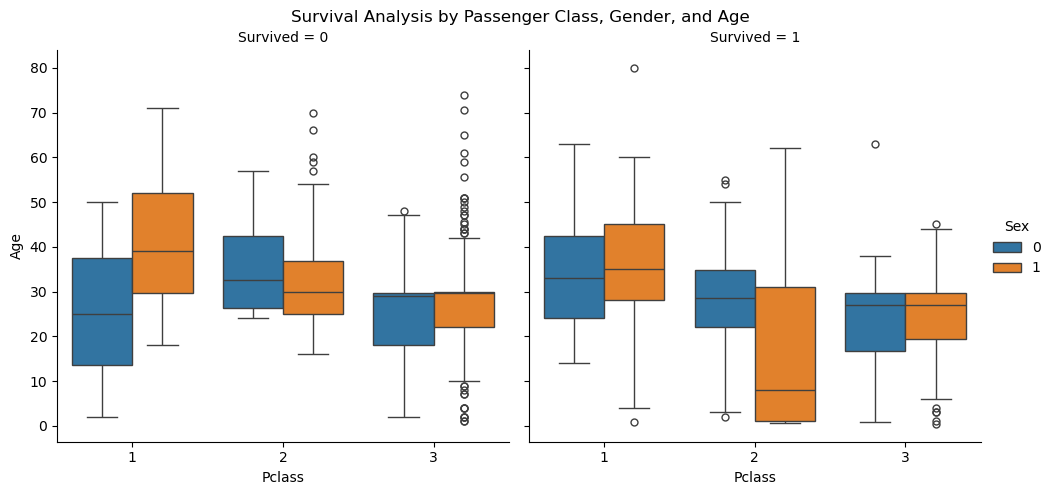

In [32]:
plt.figure(figsize=(12, 8))
sns.catplot(x='Pclass', y='Age', hue='Sex', col='Survived', data=data, kind='box', height=5, aspect=1)
plt.subplots_adjust(top=0.9)
plt.suptitle('Survival Analysis by Passenger Class, Gender, and Age')
plt.show()

## Train your model (Classification)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2,random_state=1)

<h3 style="text-align: center; margin: 0; background-color: cadetblue; color: white; border-radius: 15px;">Feature Engineering</h3>

In [34]:
index=data.drop('Survived',axis=1).columns

<h3 style="text-align: center; margin: 0; background-color: cadetblue; color: white; border-radius: 15px;">According to the calculations and the following chart, considering a threshold of 10%, the following features can be selected:</h3>
<ul style="margin: 0; direction: ltr; background-color: cadetblue; color: white; border-radius: 15px;">
<li>Sex</li>
<li>Fare</li>
<li>Age</li>
<li>Cabin</li>
<li>Ticket</li>
</ul>

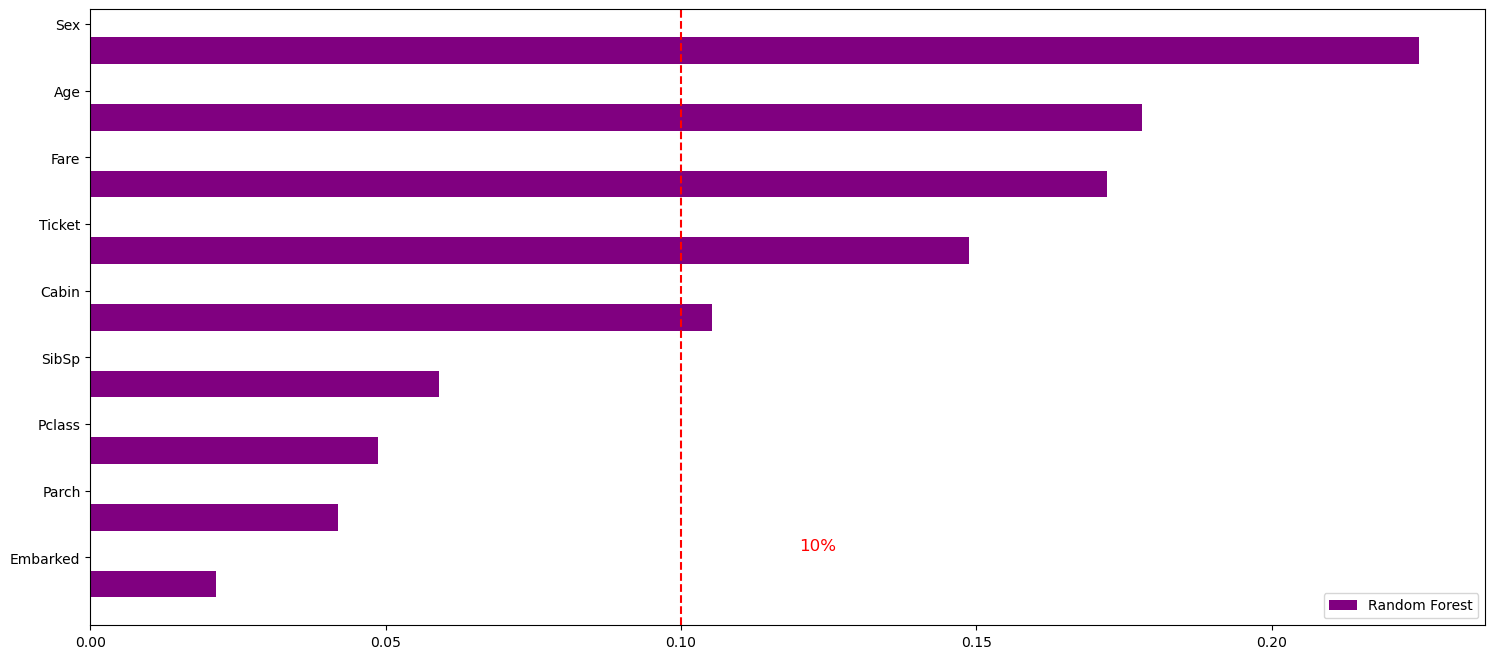

In [35]:
rfc = RandomForestClassifier(n_estimators=2000,max_depth=15,random_state=0,criterion='gini')
y_pred = rfc.fit(X_train,y_train).predict(X_test)
feature_importance=pd.DataFrame({'rfc':rfc.feature_importances_},index=data.drop('Survived',axis=1).columns)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)
index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)
plt.axvline(x=0.1, color='r', linestyle='--')
plt.text(0.12, 0.5, '10%', color='r', fontsize=12)
ax.legend()
plt.show()



<h3 style="text-align: center; margin: 0; direction: ltr; background-color: cadetblue; color: white; border-radius: 15px;">We form new X_train and X_test sets based on the new features.</h3>

In [36]:
X_train = X_train[:,[1,2,5,6,7]]
X_test = X_test[:,[1,2,5,6,7]]

<h3 style="text-align: center; margin: 0; direction: rtl; background-color: cadetblue; color: white; border-radius: 15px;">KNN Classifier</h3>

#### Grid SearchCV

In [37]:
model = KNeighborsClassifier()
param = {
    'n_neighbors' : range(1,100,1),
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights' : ['uniform','distance']
}
gridSrch = GridSearchCV(estimator=model, param_grid=param,scoring='accuracy',cv=5,n_jobs=-1,verbose=3)
gridSrch.fit(X_train,y_train)
print('KNeighborsClassifier best parameters => ',gridSrch.best_params_)
print('KNeighborsClassifier best Score => ',gridSrch.best_score_)

Fitting 5 folds for each of 792 candidates, totalling 3960 fits
KNeighborsClassifier best parameters =>  {'algorithm': 'auto', 'n_neighbors': 13, 'weights': 'uniform'}
KNeighborsClassifier best Score =>  0.8253968253968255


#### Training

In [38]:
knnClf = KNeighborsClassifier(n_neighbors=13)
y_pred_knn = knnClf.fit(X_train,y_train).predict(X_test)

knn_best_score = accuracy_score(y_test,y_pred_knn)
cros_vall_knn = cross_val_score(knnClf, X_test, y_test, cv=5, scoring='accuracy').mean()
print('cross_val_score is=> ',cros_vall_knn)
print('accuracy score is=> ',knn_best_score)
print(confusion_matrix(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))


cross_val_score is=>  0.7630158573820546
accuracy score is=>  0.758765778401122
[[371  61]
 [111 170]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       432
           1       0.74      0.60      0.66       281

    accuracy                           0.76       713
   macro avg       0.75      0.73      0.74       713
weighted avg       0.76      0.76      0.75       713



<h3 style="text-align: center; margin: 0; direction: rtl; background-color: cadetblue; color: white; border-radius: 15px;">Decision Tree</h3>

#### Grid SearchCV

In [39]:
model = DecisionTreeClassifier()
param = {
    'criterion': ['gini', 'entropy','log_loss'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
gridSrch = GridSearchCV(estimator=model, param_grid=param,scoring='accuracy',cv=5,n_jobs=-1,verbose=3)
gridSrch.fit(X_train,y_train)
dt_best_score = gridSrch.best_score_
print('Decision Tree Classifier best parameters => ',gridSrch.best_params_)
print('Decision Tree Classifier best Score => ',dt_best_score)


Fitting 5 folds for each of 135 candidates, totalling 675 fits
Decision Tree Classifier best parameters =>  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Classifier best Score =>  0.7636507936507936


#### Training

In [40]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 1, min_samples_split = 2)
y_pred_dt = dt.fit(X_train,y_train).predict(X_test)

dt_best_score = accuracy_score(y_test,y_pred_dt)
cros_vall_dt = cross_val_score(knnClf, X_test, y_test, cv=5, scoring='accuracy').mean()
print('cross_val_score is=> ',cros_vall_dt)
print('accuracy score is=> ',dt_best_score)
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))


cross_val_score is=>  0.7630158573820546
accuracy score is=>  0.7713884992987378
[[368  64]
 [ 99 182]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       432
           1       0.74      0.65      0.69       281

    accuracy                           0.77       713
   macro avg       0.76      0.75      0.75       713
weighted avg       0.77      0.77      0.77       713



<h3 style="text-align: center; margin: 0; direction: rtl; background-color: cadetblue; color: white; border-radius: 15px;">Random Forest</h3>

#### Grid SearchCV

In [41]:
model = RandomForestClassifier()

param = {
    'criterion': ['gini', 'entropy','log_loss'],
    'n_estimators': range(100,1000,100),
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

gridSrch = GridSearchCV(estimator=model, param_grid=param,scoring='accuracy',cv=5,n_jobs=-1,verbose=3)
gridSrch.fit(X_train,y_train)
rf_best_score = gridSrch.best_score_
print('Random Forest Classifier best parameters => ',gridSrch.best_params_)
print('Random Forest Classifier best Score => ',rf_best_score)

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
Random Forest Classifier best parameters =>  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Classifier best Score =>  0.8368253968253969


#### Training

In [42]:
rfc = RandomForestClassifier(bootstrap = True, criterion = 'log_loss', max_depth = None,
                              min_samples_leaf = 4, min_samples_split = 2, n_estimators = 300)
y_pred_rfc = rfc.fit(X_train,y_train).predict(X_test)

rfc_best_score = accuracy_score(y_test,y_pred_rfc)
cros_vall_rfc = cross_val_score(rfc, X_test, y_test, cv=5, scoring='accuracy').mean()
print('cross_val_score is=> ',cros_vall_rfc)
print('accuracy score is=> ',rfc_best_score)
print(confusion_matrix(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))

cross_val_score is=>  0.8009258347286515
accuracy score is=>  0.7713884992987378
[[366  66]
 [ 97 184]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       432
           1       0.74      0.65      0.69       281

    accuracy                           0.77       713
   macro avg       0.76      0.75      0.76       713
weighted avg       0.77      0.77      0.77       713



<h3 style="text-align: center; margin: 0; direction: rtl; background-color: cadetblue; color: white; border-radius: 15px;">SVM</h3>

#### Grid SearchCV

In [43]:
model = SVC()

param = [
    {
        'C': [0.01, 0.1, 1, 10, 100],  
        'gamma': [0.0001, 0.001, 0.01, 0.1, 1], 
        'kernel': ['rbf'],
        'shrinking': [True, False],
        'probability': [True, False]
    },
    {
        'C': [0.01, 0.1, 1, 10, 100],  
        'kernel': ['linear'],
        'shrinking': [True, False],
        'probability': [True, False]
    },
    {
        'C': [0.01, 0.1, 1, 10, 100],  
        'gamma': [0.0001, 0.001, 0.01, 0.1, 1], 
        'kernel': ['poly'],
        'degree': [2, 3, 4, 5],
        'coef0': [-1, -0.5, 0, 0.5, 1],
        'shrinking': [True, False],
        'probability': [True, False]
    },
    {
        'C': [0.01, 0.1, 1, 10, 100],  
        'gamma': [0.0001, 0.001, 0.01, 0.1, 1], 
        'kernel': ['sigmoid'],
        'coef0': [-1, -0.5, 0, 0.5, 1],
        'shrinking': [True, False],
        'probability': [True, False]
    }
]

gridSrch = GridSearchCV(estimator=model, param_grid=param,scoring='accuracy',cv=5,n_jobs=-1,verbose=3)
gridSrch.fit(X_train,y_train)
svc_best_score = gridSrch.best_score_
print('Random Forest Classifier best parameters => ',gridSrch.best_params_)
print('Random Forest Classifier best Score => ',svc_best_score)

Fitting 5 folds for each of 2620 candidates, totalling 13100 fits
Random Forest Classifier best parameters =>  {'C': 0.01, 'coef0': 1, 'degree': 3, 'gamma': 1, 'kernel': 'poly', 'probability': True, 'shrinking': True}
Random Forest Classifier best Score =>  0.8255555555555556


#### Training

In [44]:
svc = SVC(C = 0.01, coef0 = 1, degree = 3, gamma = 1, kernel = 'poly', probability = True, shrinking = True)

y_pred_svc = svc.fit(X_train,y_train).predict(X_test)

svc_best_score = accuracy_score(y_test,y_pred_svc)
cros_vall_svc = cross_val_score(rfc, X_test, y_test, cv=5, scoring='accuracy').mean()
print('cross_val_score is=> ',cros_vall_svc)
print('accuracy score is=> ',svc_best_score)
print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))

cross_val_score is=>  0.8023145868216291
accuracy score is=>  0.7489481065918654
[[371  61]
 [118 163]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       432
           1       0.73      0.58      0.65       281

    accuracy                           0.75       713
   macro avg       0.74      0.72      0.73       713
weighted avg       0.75      0.75      0.74       713



<h3 style="text-align: center; margin: 0; direction: rtl; background-color: cadetblue; color: white; border-radius: 15px;">XGBoost</h3>

#### Grid SearchCV

In [45]:
model = XGBClassifier()
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
    'objective': ['binary:logistic']
}
gridSrch = GridSearchCV(estimator=model, param_grid=param,scoring='accuracy',cv=5,n_jobs=-1,verbose=3)
gridSrch.fit(X_train,y_train)
xgb_best_score = gridSrch.best_score_
print('Random Forest Classifier best parameters => ',gridSrch.best_params_)
print('Random Forest Classifier best Score => ',xgb_best_score)

Fitting 5 folds for each of 2620 candidates, totalling 13100 fits
Random Forest Classifier best parameters =>  {'C': 0.01, 'gamma': 1, 'kernel': 'rbf', 'probability': True, 'shrinking': True}
Random Forest Classifier best Score =>  0.8142857142857143


#### Training

In [46]:
xgb = XGBClassifier(C = 0.01, gamma = 1, kernel = 'rbf', probability = True, shrinking = True)

y_pred_xgb = xgb.fit(X_train,y_train).predict(X_test)

xgb_best_score = accuracy_score(y_test,y_pred_xgb)
cros_vall_xgb = cross_val_score(rfc, X_test, y_test, cv=5, scoring='accuracy').mean()
print('cross_val_score is=> ',cros_vall_xgb)
print('accuracy score is=> ',xgb_best_score)
print(confusion_matrix(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))

cross_val_score is=>  0.7953117305229981
accuracy score is=>  0.7713884992987378
[[366  66]
 [ 97 184]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       432
           1       0.74      0.65      0.69       281

    accuracy                           0.77       713
   macro avg       0.76      0.75      0.76       713
weighted avg       0.77      0.77      0.77       713



<h3 style="text-align: center; margin: 0; direction: ltr; background-color: cadetblue; color: white; border-radius: 15px;">Comparing all four algorithms with each other.</h3>

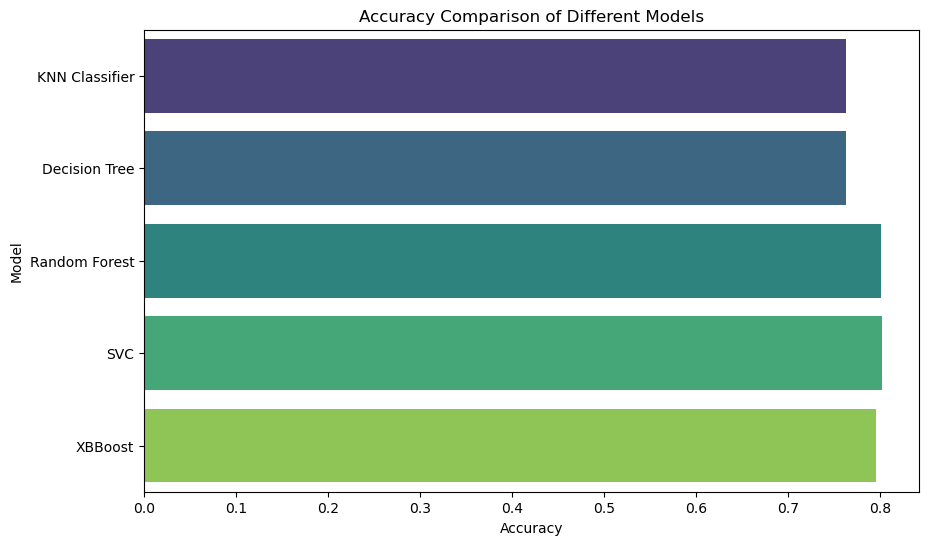

In [47]:
result = {
    'accuracy' : [cros_vall_knn,cros_vall_dt,cros_vall_rfc,cros_vall_svc,cros_vall_xgb]
}
result_df = pd.DataFrame(result,index=['KNN Classifier','Decision Tree','Random Forest','SVC','XBBoost'])

plt.figure(figsize=(10, 6))
sns.barplot(x='accuracy', y=result_df.index, data=result_df, palette='viridis')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy Comparison of Different Models')
plt.show()

## Test Result

<h3 style="text-align: center; margin: 0; direction: rtl; background-color: cadetblue; color: white; border-radius: 15px;">SVM</h3>

In [48]:
test_df_o = pd.read_csv('test.csv')
test_df_o.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [49]:
test_df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [50]:
test_df_o.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [51]:
test_df_o[['Age','Fare']] = knn_imputer.fit_transform(test_df_o[['Age','Fare']])
test_df_o[['Cabin']] = sim_imputer.fit_transform(test_df_o[['Cabin']])

In [52]:
test_df_o.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [53]:
test_df = test_df_o.drop(['Name','PassengerId'],axis=1)

In [54]:
columns_to_encode = ['Sex', 'Ticket', 'Cabin', 'Embarked']

for column in columns_to_encode:
    test_df[column] = le.fit_transform(test_df[column])

In [55]:
X = sc.fit_transform(test_df)

In [56]:
X = X[:,[1,2,5,6,7]]

In [60]:
y_pred = svc.predict(X)

In [61]:
test_df_o.iloc[:,0].values.shape

(418,)

In [62]:
result_df = pd.DataFrame(np.hstack([test_df_o.iloc[:,0].values.reshape(-1,1),y_pred.reshape(-1,1)]),columns=['PassengerId','PassengerId'])
result_df.to_csv('Submission.csv',index=False)